# Image compressor

In [204]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from skimage.util.shape import view_as_blocks

## Load image and convert it to array

In [205]:
image = imread("data/Lenna.png")
image = (2.0 * image / 1.0) - 1.0
array = np.array(image)

## Calculate sizes

In [206]:
height = np.size(array, 0)
width = np.size(array, 1)

block_height = 8
block_width = 8

input_layer_size = block_height * block_height * 3
hidden_layer_size = input_layer_size / 2

## Define conversion functions

In [207]:
def to_blocks(array):
    blocks = []
    for i in range(height // block_height):
        for j in range(width // block_width):
            block = []
            for y in range(block_height):
                for x in range(block_width):
                    for color in range(3):
                        block.append(array[i * block_height + y, j * block_width + x, color])
            blocks.append(block)
    return np.array(blocks)

def to_array(blocks):
    array = []
    blocks_in_line = width // block_width
    for i in range(height // block_height):
        for y in range(block_height):
            line = []
            for j in range(blocks_in_line):
                for x in range(block_width):
                    pixel = []
                    for color in range(3):
                        pixel.append(blocks[i * blocks_in_line + j, (y * block_width * 3) + (x * 3) + color])
                    line.append(pixel)
            array.append(line)
    return np.array(array)

def show(array):
    array = 1 * (array + 1) / 2
    plt.axis('off')
    plt.imshow(array)
    plt.show()


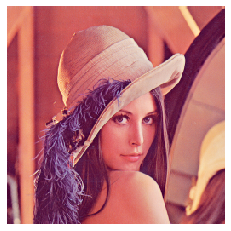

In [209]:
blocks = to_blocks(array)
restored = to_array(blocks)
show(restored)